## Federal Drug Overdose Death Counts

Data from https://catalog.data.gov/dataset/vsrr-provisional-drug-overdose-death-counts

In [2]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
od_df = pd.read_csv('../data/Drug_Overdose_Death_Counts_federal.csv')

# Data Frame Examination

In [4]:
nrows, ncolumns = od_df.shape
print(f'The overdose data has {nrows} rows and has {ncolumns} columns.')

The overdose data has 41625 rows and has 12 columns.


In [5]:
od_df.sample(20)

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
27920,OR,2015,August,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",344.000000,100,0.022544,Oregon,Numbers may differ from published reports usin...,**,344.0
21525,NE,2019,December,12 month-ending,Number of Drug Overdose Deaths,146.000000,100,0.075595,Nebraska,Numbers may differ from published reports usin...,**,147.0
14082,MA,2017,July,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,NaN,0.676369,Massachusetts,NaN,**,NaN
39584,WV,2019,June,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",201.000000,100,0.592729,West Virginia,Numbers may differ from published reports usin...,**,215.0
1195,AR,2016,September,12 month-ending,Percent with drugs specified,69.393140,NaN,0.068762,Arkansas,Numbers may differ from published reports usin...,**,NaN
40563,WY,2020,August,12 month-ending,Number of Deaths,5008.000000,100,0.000000,Wyoming,Underreported due to incomplete data.,*,NaN
10545,IL,2019,July,12 month-ending,Number of Deaths,105232.000000,100,0.111183,Illinois,Numbers may differ from published reports usin...,**,NaN
32992,TX,2017,June,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,NaN,0.131397,Texas,Numbers may differ from published reports usin...,**,NaN
7390,GA,2017,October,12 month-ending,Heroin (T40.1),NaN,NaN,0.092118,Georgia,NaN,**,NaN
28617,OR,2019,September,12 month-ending,Percent with drugs specified,97.142857,100,0.054050,Oregon,Numbers may differ from published reports usin...,**,NaN


Each row represents a specific data value for a state in a specific year and for a specific month that ends the 12 month period. For example, the first row above represents the 12 month period ending with January 2017 for the state of Alabama showing how many drug overdose deaths occured, compared to the predicted value. 

The columns represent the different data per row with indicator and data value being specified to each other, as well as the state, state abbreviation, year, month, and percent pending investigation (aka how much data has been processed for the state). 

# Data Cleaning

In [6]:
od_df = od_df.drop(['Period', 'Footnote', 'Footnote Symbol', 'State Name'], axis=1)

In [7]:
od_df = od_df.rename(columns={'Data Value': 'Data_Value',
                                     'Percent Complete': 'Percent_Complete', 'Percent Pending Investigation': 'Percent_Pending_Investigation', 'Predicted Value':'Predicted_Value'
                                     })

### Note on working with data frame as is vs pivot
* With a long data frame like this you could use it as it is but select rows by indicator

In [8]:
indicators = od_df['Indicator'].unique()
indicators

array(['Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Number of Deaths', 'Opioids (T40.0-T40.4,T40.6)',
       'Cocaine (T40.5)', 'Synthetic opioids, excl. methadone (T40.4)',
       'Psychostimulants with abuse potential (T43.6)', 'Heroin (T40.1)',
       'Percent with drugs specified', 'Number of Drug Overdose Deaths',
       'Methadone (T40.3)'], dtype=object)

* Then in your exploration and analysis you could do
    * Number of Deaths by state and year as:

In [9]:
num_death_filter = od_df['Indicator']=='Number of Deaths'
od_df[num_death_filter].groupby(['State','Year'])['Data_Value'].sum()

State  Year
AK     2015     50086.0
       2016     51141.0
       2017     51597.0
       2018     51865.0
       2019     53484.0
                 ...   
YC     2017    651189.0
       2018    659900.0
       2019    653118.0
       2020    897186.0
       2021    252370.0
Name: Data_Value, Length: 371, dtype: float64

In [10]:
# unstack by level (level 0 is year and level 1 second item in the groupby, i.e. state)
# items in that level become the row index
# e.g. level=0 will use year as row index and columns for each state
od_df[num_death_filter].groupby(['State','Year'])['Data_Value'].sum().unstack(level=0).head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,US,UT,VA,VT,WA,WI,WV,WY,YC
Year,,,,,,,,,,,,,,,,,,,,,
2015,50086.0,607641.0,368117.0,642297.0,3056952.0,441445.0,366126.0,68282.0,103231.0,2318771.0,...,2289797.0,32430672.0,212365.0,774031.0,68864.0,643835.0,614301.0,265538.0,53812.0,650136.0
2016,51141.0,608611.0,366574.0,679217.0,3139581.0,450894.0,362773.0,69250.0,103860.0,2360692.0,...,2308662.0,32586196.0,219344.0,775307.0,68688.0,656102.0,612995.0,262060.0,52723.0,643266.0
2017,51597.0,623769.0,378076.0,686329.0,3202053.0,461701.0,375123.0,75096.0,109046.0,2433010.0,...,2369974.0,33517145.0,222049.0,802829.0,69528.0,676325.0,626083.0,268237.0,52181.0,651189.0
2018,51865.0,639981.0,385161.0,722039.0,3262105.0,468890.0,378957.0,74621.0,112610.0,2505439.0,...,2464268.0,34181114.0,227018.0,817646.0,69687.0,680952.0,640793.0,275716.0,54073.0,659900.0
2019,53484.0,634030.0,383804.0,722289.0,3219523.0,474111.0,379582.0,71722.0,111452.0,2490647.0,...,2442420.0,34024454.0,230380.0,825756.0,68254.0,691003.0,639111.0,273028.0,56144.0,653118.0


In [11]:
# e.g. level=1 will use state as row index and columns for each year
od_df[num_death_filter].groupby(['State','Year'])['Data_Value'].sum().unstack(level=1).head()

Year,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,
AK,50086.0,51141.0,51597.0,51865.0,53484.0,55824.0,15205.0
AL,607641.0,608611.0,623769.0,639981.0,634030.0,682214.0,201417.0
AR,368117.0,366574.0,378076.0,385161.0,383804.0,407063.0,118243.0
AZ,642297.0,679217.0,686329.0,722039.0,722289.0,810438.0,246962.0
CA,3056952.0,3139581.0,3202053.0,3262105.0,3219523.0,3457308.0,1043401.0


* You can then use these data frames for further analysis and plotting

<AxesSubplot:xlabel='State'>

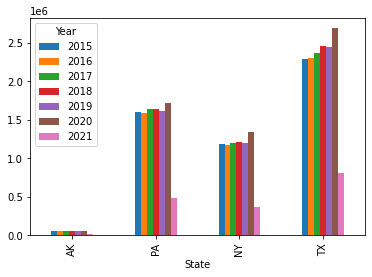

In [12]:
deaths_bystate=od_df[num_death_filter].groupby(['State','Year'])['Data_Value'].sum().unstack(level=1)

states_to_plot = ['AK', 'PA', 'NY', 'TX']

deaths_bystate.loc[states_to_plot].plot(kind='bar')

<AxesSubplot:xlabel='Year'>

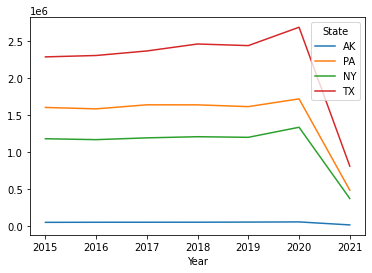

In [13]:
# better would be line points with year on x-axis

deaths_byyear=od_df[num_death_filter].groupby(['State','Year'])['Data_Value'].sum().unstack(level=0)

deaths_byyear[states_to_plot].plot()

* So I think keeping the data in long form could work easily


* However, it is possible to use `.pivot()` to create a wide version of `od_df` where columns are the indicators

In [14]:
od_wide_df=od_df.pivot(index=['State','Year', 'Month'], 
                       columns='Indicator', values='Data_Value')
od_wide_df

Indicator             Cocaine (T40.5)  Heroin (T40.1)  Methadone (T40.3)  \
State Year Month                                                           
AK    2015 April                  NaN             NaN                NaN   
           August                 NaN             NaN                NaN   
           December               NaN             NaN                NaN   
           February               NaN             NaN                NaN   
           January                NaN             NaN                NaN   
...                               ...             ...                ...   
YC    2020 October              826.0           800.0              267.0   
           September            803.0           791.0              260.0   
      2021 February             895.0           801.0              296.0   
           January              891.0           817.0              296.0   
           March                908.0           800.0              304.0   

Indicator             Natural & semi-synthetic opioids (T40.2)  \
State Year Month                                                 
AK    2015 April                                           NaN   
           August                                          NaN   
           December                                        NaN   
           February                                        NaN   
           January                                         NaN   
...                                                        ...   
YC    2020 October                                       460.0   
           September                                     445.0   
      2021 February                                      456.0   
           January                                       464.0   
           March                                         452.0   

Indicator             Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)  \
State Year Month                                                                         
AK    2015 April                                                    NaN                  
           August                                                   NaN                  
           December                                                 NaN                  
           February                                                 NaN                  
           January                                                  NaN                  
...                                                                 ...                  
YC    2020 October                                                652.0                  
           September                                              632.0                  
      2021 February                                               675.0                  
           January                                                681.0                  
           March                                                  672.0                  

Indicator             Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)  \
State Year Month                                                                                    
AK    2015 April                                                    NaN                             
           August                                                   NaN                             
           December                                                 NaN                             
           February                                                 NaN                             
           January                                                  NaN                             
...                                                                 ...                             
YC    2020 October                                               1695.0                             
           September                                             1636.0 

* But this has nested index you probably want `State`, `Year` and `Month` as columns

* So you can just reset the index

In [15]:
od_wide_df = od_wide_df.reset_index()
od_wide_df.head()

Indicator,State,Year,Month,Cocaine (T40.5),Heroin (T40.1),Methadone (T40.3),Natural & semi-synthetic opioids (T40.2),"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)","Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",Number of Deaths,Number of Drug Overdose Deaths,"Opioids (T40.0-T40.4,T40.6)",Percent with drugs specified,Psychostimulants with abuse potential (T43.6),"Synthetic opioids, excl. methadone (T40.4)"
0,AK,2015,April,NaN,NaN,NaN,NaN,NaN,NaN,4133.0,126.0,NaN,88.095238,NaN,NaN
1,AK,2015,August,NaN,NaN,NaN,NaN,NaN,NaN,4222.0,124.0,NaN,87.903226,NaN,NaN
2,AK,2015,December,NaN,NaN,NaN,NaN,NaN,NaN,4193.0,121.0,NaN,89.256198,NaN,NaN
3,AK,2015,February,NaN,NaN,NaN,NaN,NaN,NaN,4084.0,127.0,NaN,88.976378,NaN,NaN
4,AK,2015,January,NaN,NaN,NaN,NaN,NaN,NaN,4034.0,126.0,NaN,89.682540,NaN,NaN


* The problem with this format is the the long column names for indicators


* So you'd need to do some renaming

Trying to clean the data, I realized that having this many rows for each state and no specific columns for the various indicators would look cleaner and easier to interpret for a wide form instead of the current long form. I tried to pivot the data, but I am not quite sure how to do that. I am getting the error above, saying the index contains duplicate entries, but the point was to condense all of the rows for one state into one row with more columns. I will look to clean the DataFrame up by making it wide form when I learn how in class. 

In [16]:
od_df.to_csv('../data/drug_overdose_death_clean.csv')

# Data Exploration

In [17]:
od_df['Year'].sort_values()

0        2015
33555    2015
33554    2015
33553    2015
33552    2015
         ... 
20242    2021
20243    2021
20244    2021
20237    2021
41624    2021
Name: Year, Length: 41625, dtype: int64

In [18]:
od_df['State'].nunique()

53

In [19]:
od_df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YC'], dtype=object)

The data ranges from 2015 to 2021, and the data includes values from all 50 states as well as the greater United States, Washington D.C., and New York City (with State identifiers US, DC, ad YC, respectively). 

In [20]:
indicators = od_df['Indicator'].unique()
print(indicators)

['Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'
 'Natural & semi-synthetic opioids (T40.2)'
 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'
 'Number of Deaths' 'Opioids (T40.0-T40.4,T40.6)' 'Cocaine (T40.5)'
 'Synthetic opioids, excl. methadone (T40.4)'
 'Psychostimulants with abuse potential (T43.6)' 'Heroin (T40.1)'
 'Percent with drugs specified' 'Number of Drug Overdose Deaths'
 'Methadone (T40.3)']


As seen above since each indicator above shows different data for each state, it would be ideal to make the data into the wide form as I tried to do above. If it were possible to turn the data into wide form, it would be easier to seperate and visualize the data. The other option would be to divide the DataFrame into individual DataFrames with each specific indicator as a filter.  

I would like to explore changing the data into wide form or making the indicators into individual data frames as my next step. 